In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cifar10 = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
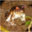

In [4]:
X_train_full[0]

In [5]:
print("min pixel value: ", X_train_full.min())
print("max pixel value: ", X_train_full.max())

min pixel value:  0
max pixel value:  255


In [6]:
# chuẩn hoá
X_train_full = X_train_full/255.
X_test = X_test/255.

In [7]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
X_train.shape

(45000, 32, 32, 3)

In [9]:
# số lượng label
unique_label = np.unique(y_train)
unique_label

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
number_label = len(unique_label)
number_label

10

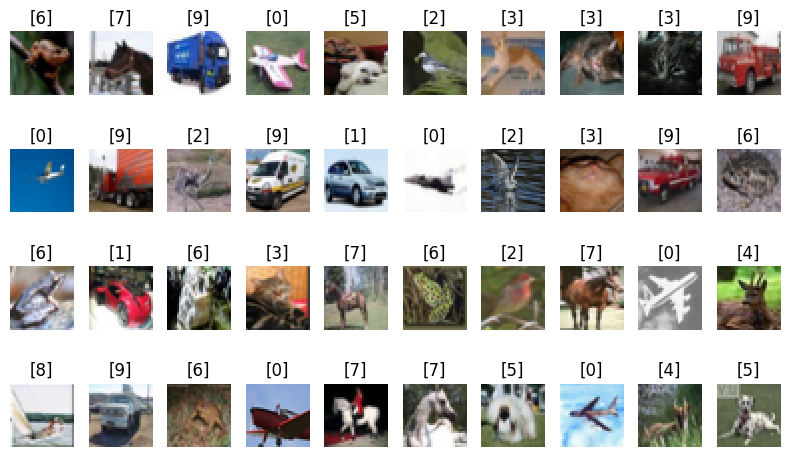

In [11]:
n_row = 4
n_col = 10

plt.figure(figsize=(8,5))
for row in range(n_row):
  for col in range(n_col):
    index = row * n_col + col
    plt.subplot(n_row, n_col, index+1)
    plt.imshow(X_train[index])
    plt.axis('off')
    plt.title(y_train[index])

plt.tight_layout()
plt.show()

# Tìm learning rate và thử nghiệm với mô hình ko có regularization

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
for _ in range (0,19):
  model.add(tf.keras.layers.Dense(100, activation = 'swish', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(number_label,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 490,110 (1.87 MB)

 Trainable params: 490,110 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_copy = tf.keras.models.clone_model(model)

In [58]:
model_copy.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 490,110 (1.87 MB)

 Trainable params: 490,110 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
class ExponentialLearningRate(tf.keras.callbacks.Callback):
  def __init__(self, factor):
    self.factor = factor
    self.losses = []
    self.rates = []

  def on_batch_end(self,batch, logs = None):
    lr = self.model.optimizer.learning_rate.numpy() * self.factor
    self.model.optimizer.learning_rate = lr
    self.rates.append(lr)
    self.losses.append(logs['loss'])

  def plot(self):
    plt.plot(self.rates, self.losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(self.losses), min(self.rates), max(self.rates))
    plt.axis([min(self.rates), max(self.rates), 0, max(self.losses)])
    plt.grid()
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.show()


In [68]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-6)
model_copy.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [69]:
expon_lr = ExponentialLearningRate(factor = 1.01)
tmp = model_copy.fit(X_train, y_train, batch_size=32, epochs = 1, validation_data=(X_valid,y_valid), callbacks = [expon_lr])

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.1458 - loss: 2.2945 - val_accuracy: 0.1038 - val_loss: 2.6983


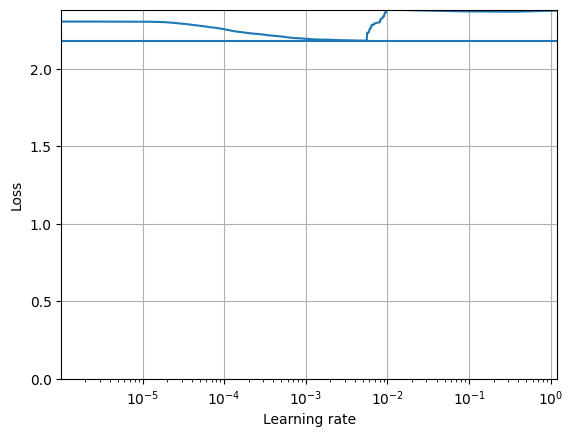

In [70]:
expon_lr.plot()

In [43]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics =['accuracy'])

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience= 20, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("my_best_model_cifar10.keras", save_best_only=True)

In [45]:
batch_size = 32
epochs = 100

In [46]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data = (X_valid, y_valid), callbacks =[early_stopping, model_checkpoint])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2042 - loss: 2.0924 - val_accuracy: 0.3090 - val_loss: 1.8436
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.3257 - loss: 1.8291 - val_accuracy: 0.3536 - val_loss: 1.7920
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3712 - loss: 1.7344 - val_accuracy: 0.3692 - val_loss: 1.7350
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3957 - loss: 1.6810 - val_accuracy: 0.3920 - val_loss: 1.6729
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4085 - loss: 1.6388 - val_accuracy: 0.4082 - val_loss: 1.6479
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4307 - loss: 1.5954 - val_accuracy: 0.3906 - val_loss: 1.7265
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4384 - loss: 1.5767 - val_accuracy: 0.4204 - val_loss: 1.6165
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4452 - loss:

In [49]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4635 - loss: 1.5377


[1.5460008382797241, 0.4564000070095062]

# Thêm Batch Normalization

In [83]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32,32,3]))
for _ in range(20):
  model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('swish'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 508,210 (1.94 MB)

 Trainable params: 504,210 (1.92 MB)

 Non-trainable params: 4,000 (15.62 KB)

In [72]:
model_copy = tf.keras.models.clone_model(model)

In [73]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-6)
model_copy.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [74]:
expon_lr = ExponentialLearningRate(factor = 1.005)
tmp = model_copy.fit(X_train, y_train, batch_size=32, epochs = 2, validation_data=(X_valid,y_valid), callbacks = [expon_lr])

Epoch 1/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.1116 - loss: 2.5658 - val_accuracy: 0.1848 - val_loss: 2.8716
Epoch 2/2
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2406 - loss: 2.0564 - val_accuracy: 0.1040 - val_loss: 2.3814


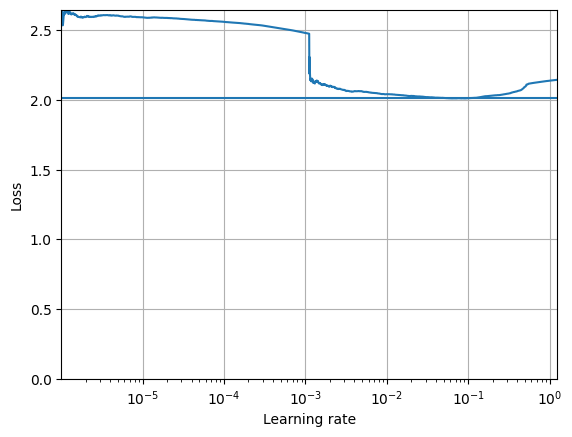

In [75]:
expon_lr.plot()

In [84]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=6e-4)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [85]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience= 20, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("my_best_model_cifar10.keras", save_best_only=True)

In [86]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid), callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.2028 - loss: 2.1739 - val_accuracy: 0.3188 - val_loss: 1.9050
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3489 - loss: 1.7982 - val_accuracy: 0.2836 - val_loss: 2.1105
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4004 - loss: 1.6827 - val_accuracy: 0.4222 - val_loss: 1.6289
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4318 - loss: 1.5971 - val_accuracy: 0.3796 - val_loss: 1.7256
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4455 - loss: 1.5544 - val_accuracy: 0.4320 - val_loss: 1.5925
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4692 - loss: 1.4922 - val_accuracy: 0.4236 - val_loss: 1.6410
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4844 - loss: 1.4561 - val_accuracy: 0.4106 - val_loss: 1.7380
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4999 

In [87]:
model = tf.keras.models.load_model("my_best_model_cifar10.keras")
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4936 - loss: 1.4398


[1.4378955364227295, 0.492000013589859]

In [88]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4856 - loss: 1.4558


[1.4596573114395142, 0.48429998755455017]

In [89]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [94]:
epochs = range(len(acc))
epochs

range(0, 30)

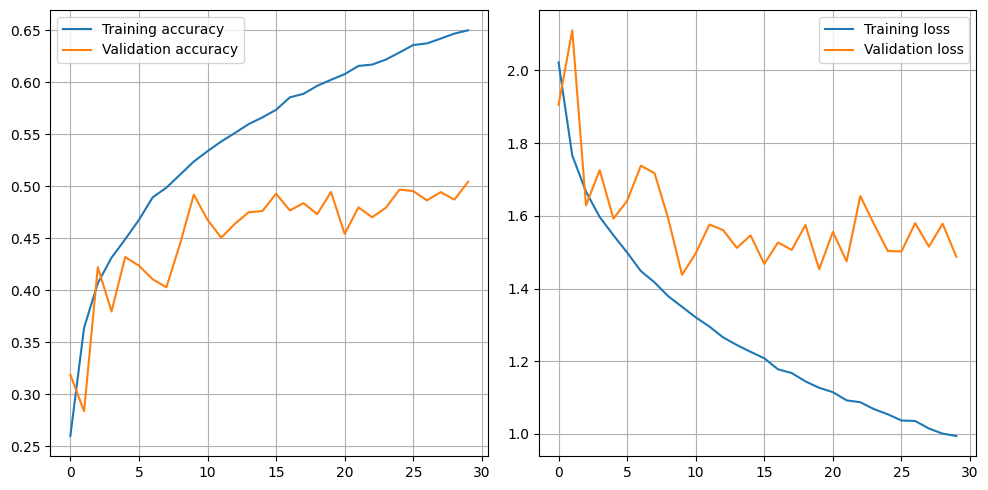

In [100]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, label = "Training accuracy")
plt.plot(epochs, val_acc, label = "Validation accuracy")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, label = "Training loss")
plt.plot(epochs, val_loss, label = "Validation loss")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()